<a href="https://colab.research.google.com/github/sureshmecad/CloudyML-AI-FOR-ALL/blob/main/Gradient_Descent_CloudyML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><u> Gradient Descent</u> </center>

Optimization is a big part of machine learning. Almost every machine learning algorithm has an optimization algorithm at it’s core.Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.


In this assignment we will go through an example of implementing **Gradient Descent** in simple and multiple linear regression, for this we will be using housing dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Importing pandas 
import pandas as pd
import numpy as np

In [2]:
# read Housing dataset
housing = pd.read_csv("/content/drive/MyDrive/CloudyML/Housing.zip")

# print head
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# print housing datatype information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
# Converting columns with Yes and No values (Yes to 1 and No to 0)
housing['mainroad'] = housing['mainroad'].map({'Yes':1, "No":0})
housing['guestroom'] = housing['guestroom'].map({'Yes':1, "No":0})
housing['basement'] = housing['basement'].map({'Yes':1, "No":0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'Yes':1, "No":0})
housing['airconditioning'] = housing['airconditioning'].map({'Yes':1, "No":0})
housing['prefarea'] = housing['prefarea'].map({'Yes':1, "No":0})

In [5]:
# Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)

# concat housing and status 
housing = pd.concat([housing, status], axis=1)

# drop furnishingstatus columns from housing
housing.drop('furnishingstatus', axis=1, inplace=True)

In [6]:
# print head
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,NaN,NaN,NaN,NaN,NaN,2,NaN,0,0
1,12250000,8960,4,4,4,NaN,NaN,NaN,NaN,NaN,3,NaN,0,0
2,12250000,9960,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,1,0
3,12215000,7500,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,0,0
4,11410000,7420,4,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,0,0


#### Scaling (Normalization)

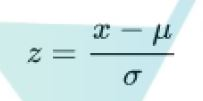

where:

- μ is the mean of the population.
- σ is the standard deviation of the population.

In [7]:
# Normalising Housing dataset using above formula
housing = (housing - housing.mean()) / housing.std()

# print head 
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,NaN,NaN,NaN,NaN,NaN,1.516299,NaN,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,NaN,NaN,NaN,NaN,NaN,2.676950,NaN,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,NaN,NaN,NaN,NaN,NaN,1.516299,NaN,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,NaN,NaN,NaN,NaN,NaN,2.676950,NaN,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,NaN,NaN,NaN,NaN,NaN,1.516299,NaN,-0.844113,-0.69579


## 1. Gradient Descent in Simple Linear Regression

Reference video: https://www.youtube.com/watch?v=4PHI11lX11I

Let us first make Simple linear regression. Fot this we will just take area as our feature and price as our predictor

In [8]:
# Assign feature variable X
X = housing['area']

# Assign response variable to y
y = housing['price']

In [9]:
# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Magic matplotlib inline for visualise in the notebook
%matplotlib inline

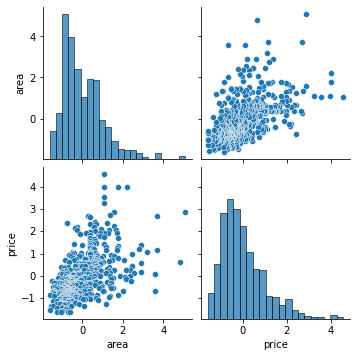

In [10]:
# Visualise the relationship between the features and the response using pairplots
sns.pairplot(housing[['area', 'price']]);

### Steps to implement gradient Descent

1. **We all know to define a linear relationship between these two variables as follows:**

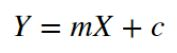

This is the equation for a line that you studied in high school. m is the slope of the line and c is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.


2. **For linear regression we use a cost function known as the mean squared error or MSE.**

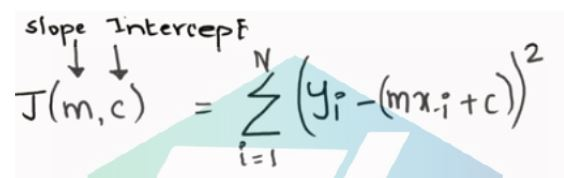

The loss/cost is the error in our predicted value of m and c. Our goal is to minimize this error to obtain the most accurate value of m and c.
So we square the error and find the mean. hence the name Mean Squared Error. Now that we have defined the loss function, lets get into the interesting part — minimizing it and finding m and c.

3. **Gradient Descent**

Now that we have defined the loss function, lets get into the interesting part — minimizing it and finding m and c.

Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.

    3.1 Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.



    3.2. Now we will apply partial derivative with respect to m and c and will equate it to zero to find the least value of m and c for which our cost function get the lowest value as possible.**

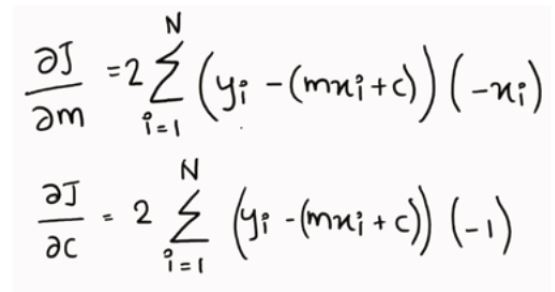

    3.3  Now we update the current value of m and c using the following equation:

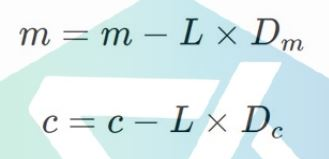

    3.4 We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.

Now to apply gradient descent from scratch in python we need our X and y variables as numpy arrays, Let's convert them.

In [13]:
# Convert X and y into numpy arrays
X = np.array(X)
y = np.array(y)

In [14]:
# Initialising m=0
m = 0

# Initialising c=0
c = 0

# The learning Rate (here using 0.01)
L =  0.01

# The number of iterations to perform gradient descent (1000)
epochs = 1000

# Number of elements in y ( y should be of float type)
n = float(len(y))

# Create an empty dataframe gd_df with columns 'm_current', 'c_current' and 'cost'
gd_df = pd.DataFrame(columns=['m_current', 'c_current', 'cost'])

Performing Gradient Descent 

In [15]:
# iterate over range of epochs
for i in range(epochs):

    # The current predicted value of Y
    Y_pred = m*X+c

    # Calculate cost according to formula 
    cost = sum([data**2 for data in (y-Y_pred)]) / n

    # Derivative w.r.t m
    D_m = (-2/n) * sum(X * (y-Y_pred))

    # Derivative w.r.t c
    D_c = (-2/n) * sum(y-Y_pred)

    # Update m
    m = m-L * D_m 

    # Update c
    c = c - L * D_c

    # get m,c and cost value at each epochs in gd_df
    gd_df.loc[i] = [m, c, cost]

In [16]:
# print gd_df
gd_df

,m_current,c_current,cost
0,0.010700,3.731979e-18,0.998165
1,0.021187,1.981697e-17,0.986830
2,0.031464,2.998621e-17,0.975943
3,0.041536,2.656387e-17,0.965486
4,0.051407,2.433120e-17,0.955442
...,...,...,...
995,0.535997,2.741375e-16,0.711399
996,0.535997,2.679610e-16,0.711399
997,0.535997,2.660787e-16,0.711399
998,0.535997,2.639846e-16,0.711399


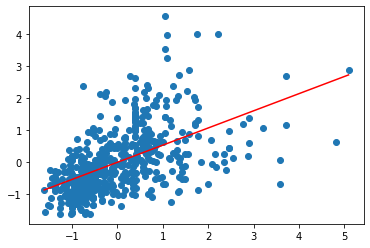

In [17]:
# Making predictions
Y_pred = m*X + c

# Plotting parity plot as shown
plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()

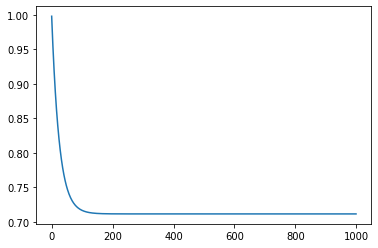

In [18]:
# plotting cost against num_iterations
plt.plot(gd_df.index, gd_df['cost'])
plt.show()

Above is a plot of all of the values for the cost function over the 1000 iterations that you should see. I think that 100 iterations or 100 epochs is a nice round number and a good place to stop, because in graph you can see that error becomes constant after 100th iteration. You could keep going if you wanted.



In [19]:
# print final m and c value
print(m, c)

0.5359973448415949 2.66616494427413e-16


Hence optimum slope/weight would be 0.53 and intercept/bias would be 2.66. This value would reduce the error and gives the best fit line for simple linear regression problem.

### Multiple Regression: Applying Gradient Descent for Multiple (>1) Features

Now you know how to optimize simple linear regression. Lets try it for multiple linear regression.

If we have multiple independent variables, the formula for linear regression will look like:

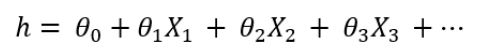

Here, ‘h’ is called the hypothesis. This is the predicted output variable. Theta0 is the bias term and all the other theta values are coefficients. They are initiated randomly in the beginning, then optimized with the algorithm so that this formula can predict the dependent variable closely.

We will first try with only 2 input variable i.e area and bedrooms

In [20]:
# Assigning feature variable X (with area and bedroom)
X = housing[['area', 'bedrooms']]

# Assigning response variable y (price)
y = housing['price']

1. Add a column of ones for the bias term. I chose 1 because if you multiply one with any value, that value does not change.

The intercept column is needed for convenient matrix representation of cost function


In [21]:
# Add a column of ones as intercept
X['intercept'] = 1

# reindex columns in sequence:- 'intercept','area' and 'bedrooms'
X = X.reindex(['intercept', 'area', 'bedrooms'], axis=1)

# print head of X
X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131


In [22]:
# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

4. Initiate the theta values. I am initiating them as zeros. But any other number should be alright.

In [23]:
# initiate theta values with array of zeroes equal to number of columns present in X
theta = np.array([0]*X.shape[1])

2. Cost function in  Multiple linear regression

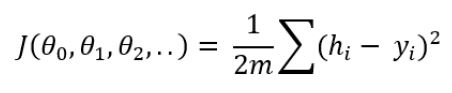

In [24]:
# Initialise m as no.of samples in X
m = len(X)

Note: 
You can make use matmul function https://numpy.org/doc/stable/reference/generated/numpy.matmul.html for multiplying all theta values with X to implement above cost function formula

Now our next part is to update the theta values. We take the partial differential of the cost function with respect to each theta value and deduct that value from the existing theta value,

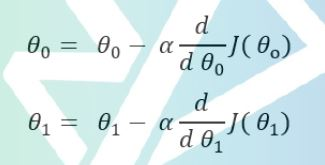

Here, alpha is the learning rate and it is a constant. I am not showing the same formula for all the theta values. But It is the same formula for all the theta values. After the differentiation, the formula comes out to be:

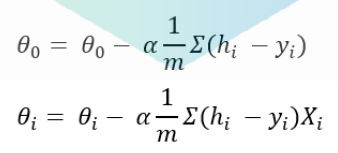

This is how we are updating bias and intercept accordingly in order to minimize cost function. This is called gradient descent.

In [25]:
# Create an empty dataframe with columns theta and cost
gdm_df2 = pd.DataFrame(columns=['theta', 'cost'])

Now since you are aware of all formulas and method to implement gradient descent. Lets apply it here.

Reference video: https://www.youtube.com/watch?v=xrPZbHrxrWo

In [27]:
# Define alpha/ learning rate (here 0.01)
alpha = 0.01

# intialise iterations to 1000
iterations = 1000

# iterate over number of iterations
for i in range(iterations):
    # calculate the derivative of each theta value/ coefficients 
    gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
    # update the theta value according to the formula after differentiation
    theta = theta - alpha * gradient
    # calculate the hypothesis by multiplying X with theta values (Hint: Use numpy matmul())
    h = np.matmul(X, theta)
    # calculate cost function
    cost = np.sum(np.square(h-y)) / (2*len(y))
    # append rows in gdm_df with updated theta and cost value
    gdm_df2.loc[i] = [theta, cost]

# print gdm_df
gdm_df2

,theta,cost
0,"[2.7786132212636947e-18, 0.010641328951860773,...",0.490824
1,"[4.774977559121774e-18, 0.015874226967184046, ...",0.486834
2,"[3.890873352356053e-18, 0.021049481374934613, ...",0.482935
3,"[6.530963333850004e-18, 0.02616773358401025, 0...",0.479124
4,"[8.804374151247572e-18, 0.03122961780945073, 0...",0.475400
...,...,...
995,"[3.321094673479617e-16, 0.49165609672441285, 0...",0.314176
996,"[3.310623946238198e-16, 0.49165631727115394, 0...",0.314176
997,"[3.3111128517903266e-16, 0.49165653581645663, ...",0.314176
998,"[3.3275726720453196e-16, 0.4916567523788092, 0...",0.314176


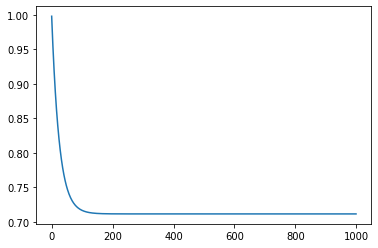

In [28]:
# plotting cost against num_iterations
plt.plot(gd_df.index, gd_df['cost'])
plt.show()

Above is a plot of all of the values for the cost function over the 1000 iterations that you should see. I think that 100 iterations or 100 epochs is a nice round number and a good place to stop in case of multiple regression problem aswell, because in graph you can see that error becomes constant after 100th iteration. You could keep going if you wanted.


Now you have just tried out gradient descent on just 1 to 2 input variables. You can also try on multiple linear regression with more than 2 variables as well. So what are you waiting for? explore more and have happy learning with us.

------------------------------

# Awesome! Congratulations you have optimized your Regression problem!
-------------------------------------

# Its Feedback Time!

We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

**Please fill this feedback form**
 https://zfrmz.in/MtRG5oWXBdesm6rmSM7N